In [ ]:
#used to find patterns in datasets - clustering model (unsupervised)

In [73]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from IPython.display import clear_output

In [23]:
#scale the data, initialize random centroids, label each data point based on distance from centroid, update centroids
#repeat steps 3 and 4 until convergence

In [37]:
#get random centroid - select random data point from dataframe
def random_centroids(data,k):
    centroids = []
    for i in range(k):
        centroid = df1.apply(lambda x: float(x.sample()))
        centroids.append(centroid)
    return pd.concat(centroids,axis=1)

In [53]:
#find euclidean distance between data points and the cluster center - then choose the closest distance
def get_labels(data,centroids):
    distance = centroids.apply(lambda x: np.sqrt(((df1-x) **2).sum(axis =1)))
    return distance.idxmin(axis=1)

In [87]:
#find the geometric mean - will need to transpose - spliting up data by labels and for each group
#apply geometric mean to each feature 
def new_centroids(data,labels,k):
    return df1.groupby(labels).apply(lambda x: np.exp(np.log(x).mean())).T

In [95]:
#plot data as 2 dimensional plot
def plot_clusters(data, labels, centroids, iteration):
    pca = PCA(n_components =2)
    data_2d = pca.fit_transform(data)
    centroids_2d = pca.transform(centroids.T)
    clear_output(wait=True)
    plt.title(f'Iteration {iteration}')
    plt.scatter(x=data_2d[:,0], y=data_2d[:,1], c=labels)
    plt.scatter(x=centroids_2d[:,0], y=centroids_2d[:,1])
    plt.show()

In [9]:
#import sales dataset
sales = pd.read_excel("practice_data.xlsx", sheet_name = "clean")

In [11]:
sales.head()

,Customer Name,Profit,Quantity,Sales
0,Darren Powers,6,2,16
1,Phillina Ober,-66,8,289
2,Mick Brown,5,3,20
3,Jack O'Briant,5,3,13
4,Lycoris Saunders,9,3,19


In [13]:
charc =["Profit","Quantity","Sales"]

In [17]:
sales = sales.dropna(subset=charc)

In [19]:
df1 = sales[charc].copy()

In [25]:
#scale data points so they can be compared (1-10)
df1 =(df1-df1.min())/(df1.max()-df1.min())*9+1

In [27]:
df1.describe()

,Profit,Quantity,Sales
count,87.000000,87.000000,87.000000
mean,5.037575,2.981191,1.781412
std,0.813013,1.999574,1.392696
min,1.000000,1.000000,1.000000
25%,4.922105,1.545455,1.033974
50%,4.948632,2.363636,1.253260
75%,5.102105,3.318182,2.003775
max,10.000000,10.000000,10.000000


In [31]:
df1.tail()

,Profit,Quantity,Sales
82,5.092632,6.454545,1.568291
83,5.039579,4.545455,1.755662
84,4.941053,2.363636,1.043240
85,5.069895,2.363636,1.253260
86,1.000000,7.545455,8.107756


In [39]:
centroids = random_centroids(df1,3)

C:\Users\nitpi\AppData\Local\Temp\ipykernel_12816\4177098134.py:4: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  centroid = df1.apply(lambda x: float(x.sample()))


In [41]:
centroids

,0,1,2
Profit,4.956211,4.831158,4.941053
Quantity,2.636364,4.272727,2.090909
Sales,1.074125,10.000000,1.037062


In [55]:
labels = get_labels(df1, centroids)

In [65]:
labels.value_counts()

2    44
0    40
1     3
Name: count, dtype: int64

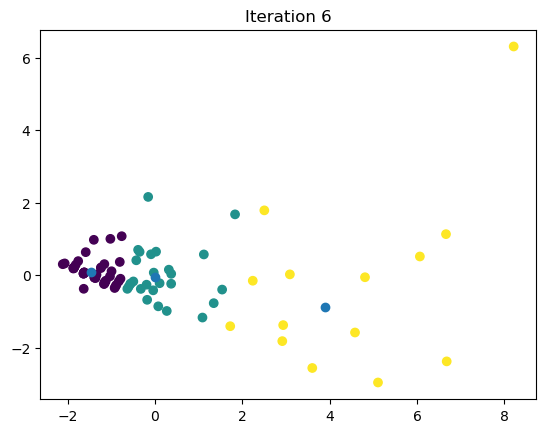

In [99]:
max_iterations = 100
k = 3
centroids = random_centroids(df1,k)
old_centroids = pd.DataFrame()
iteration = 1
while iteration < max_iterations and not centroids.equals(old_centroids):
    old_centroids = centroids
    labels = get_labels(df1,centroids)
    centroids = new_centroids(df1,labels, k)
    plot_clusters(df1, labels, centroids, iteration)
    iteration += 1

In [101]:
centroids

,0,1,2
Profit,4.905796,5.092912,4.854289
Quantity,1.667467,3.029174,6.749709
Sales,1.160020,1.698480,3.085284


In [111]:
sales[labels ==2]

,Customer Name,Profit,Quantity,Sales
5,Maria Etezadi,1342,24,4375
10,Chris Selesnick,336,24,1353
12,Brian Dahlen,250,13,1680
16,Delfina Latchford,-12,30,363
18,Toby Swindell,-288,24,378
20,Xylona Preis,184,26,710
21,Hunter Lopez,438,27,1860
27,Shirley Daniels,105,34,944
56,Shahid Collister,-62,20,575
66,Jill Stevenson,-205,16,362
